In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/06_Jun.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,26.000000,56.000000,1,5,1,2705.0,2754.0,2786.0,2721.0,3006.0,2313.0,2709.083333,2634.0
1,25.916667,56.416667,1,5,1,2675.0,2746.0,2768.0,2686.0,2974.0,2307.0,2692.750000,2572.0
2,25.833333,56.833333,1,5,1,2653.0,2720.0,2731.0,2673.0,2969.0,2340.0,2678.083333,2555.0
3,25.750000,57.250000,1,5,1,2640.0,2698.0,2785.0,2644.0,2950.0,2361.0,2657.166667,2534.0
4,25.666667,57.666667,2,5,1,2634.0,2705.0,2754.0,2620.0,2918.0,2299.0,2637.583333,2519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,35.122450,45.925632,23,1,0,3617.0,3511.0,3446.0,3798.0,3313.0,3766.0,3555.500000,3645.0
8636,35.122450,45.925632,24,1,0,3632.0,3492.0,3457.0,3695.0,3410.0,3745.0,3576.166667,3705.0
8637,35.122450,45.925632,24,1,0,3622.0,3548.0,3436.0,3696.0,3484.0,3769.0,3601.000000,3734.0
8638,35.000000,45.925632,24,1,0,3648.0,3591.0,3467.0,3675.0,3565.0,3824.0,3626.333333,3771.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7200][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.005029,-1.317734,0.176625,-1.660891,0.423061,0.644431,-0.854650,-0.751832,-0.685262,-0.863068,-0.316457,-1.892574,-0.871163
1,-1.136566,-1.333869,0.197138,-1.660891,0.423061,0.644431,-0.918226,-0.768766,-0.723320,-0.937194,-0.385837,-1.905862,-0.906771
2,-1.172632,-1.350005,0.217650,-1.660891,0.423061,0.644431,-0.964849,-0.823799,-0.801550,-0.964727,-0.396678,-1.832777,-0.938746
3,-1.217185,-1.366141,0.238162,-1.660891,0.423061,0.644431,-0.992398,-0.870366,-0.687377,-1.026145,-0.437873,-1.786269,-0.984346
4,-1.249008,-1.382276,0.258675,-1.516446,0.423061,0.644431,-1.005114,-0.855549,-0.752921,-1.076975,-0.507254,-1.923580,-1.027040


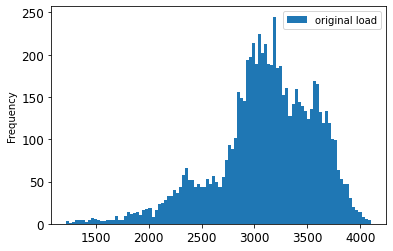

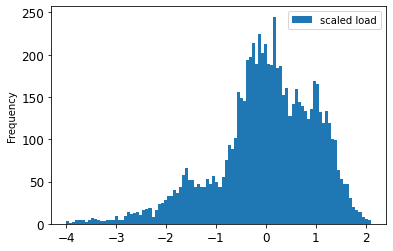

In [9]:
stlf_data[stlf_data.index <= 7200][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7200][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

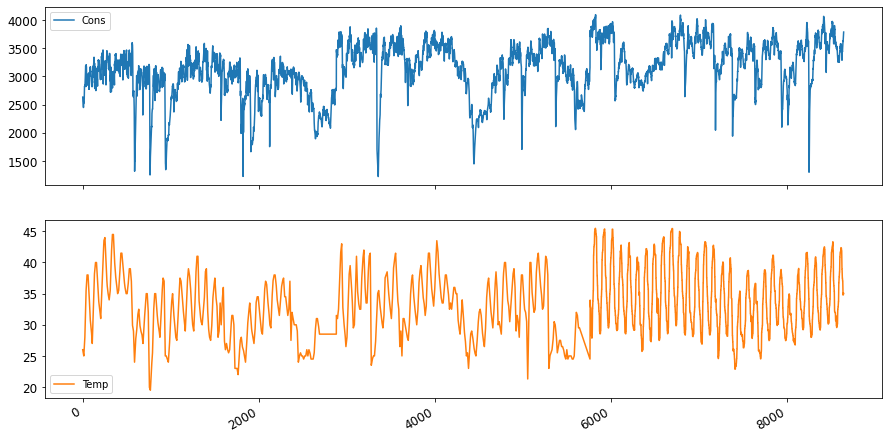

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-1.005029,-1.317734,0.176625,-1.660891,0.423061,0.644431,-0.854650,-0.751832,-0.685262,-0.863068,-0.316457,-1.892574,-0.871163,-0.538286
1,-1.136566,-1.333869,0.197138,-1.660891,0.423061,0.644431,-0.918226,-0.768766,-0.723320,-0.937194,-0.385837,-1.905862,-0.906771,-0.567988
2,-1.172632,-1.350005,0.217650,-1.660891,0.423061,0.644431,-0.964849,-0.823799,-0.801550,-0.964727,-0.396678,-1.832777,-0.938746,-0.576475
3,-1.217185,-1.366141,0.238162,-1.660891,0.423061,0.644431,-0.992398,-0.870366,-0.687377,-1.026145,-0.437873,-1.786269,-0.984346,-0.561624
4,-1.249008,-1.382276,0.258675,-1.516446,0.423061,0.644431,-1.005114,-0.855549,-0.752921,-1.076975,-0.507254,-1.923580,-1.027040,-0.612541
5,-1.255373,-1.398412,0.279187,-1.516446,0.423061,0.644431,-1.136505,-0.919049,-0.769835,-1.112979,-0.587475,-1.828348,-1.068825,-0.555259
6,-1.310534,-1.414548,0.299699,-1.516446,0.423061,0.644431,-1.172531,-0.965616,-0.824808,-1.112979,-0.537608,-1.784054,-1.110610,-0.500098
7,-1.372059,-1.430683,0.320212,-1.516446,0.423061,0.644431,-1.217035,-0.993133,-0.871323,-1.144747,-0.693714,-1.775195,-1.153667,-0.474640
8,-1.397517,-1.446819,0.340724,-1.372000,0.423061,0.644431,-1.248823,-1.005833,-0.856522,-1.278174,-0.663360,-1.830563,-1.200176,-0.553137
9,-1.372059,-1.462955,0.361236,-1.372000,0.423061,0.644431,-1.255180,-1.137067,-0.919952,-1.803410,-0.695882,-1.728686,-1.239054,-0.606176


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-1.005029,-1.317734,0.176625,-1.660891,0.423061,0.644431,-0.854650,-0.751832,-0.685262,-0.863068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.005029
1,-1.136566,-1.333869,0.197138,-1.660891,0.423061,0.644431,-0.918226,-0.768766,-0.723320,-0.937194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.005029,-1.136566
2,-1.172632,-1.350005,0.217650,-1.660891,0.423061,0.644431,-0.964849,-0.823799,-0.801550,-0.964727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.005029,-1.136566,-1.172632
3,-1.217185,-1.366141,0.238162,-1.660891,0.423061,0.644431,-0.992398,-0.870366,-0.687377,-1.026145,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.005029,-1.136566,-1.172632,-1.217185
4,-1.249008,-1.382276,0.258675,-1.516446,0.423061,0.644431,-1.005114,-0.855549,-0.752921,-1.076975,...,NaN,NaN,NaN,NaN,NaN,-1.005029,-1.136566,-1.172632,-1.217185,-1.249008
5,-1.255373,-1.398412,0.279187,-1.516446,0.423061,0.644431,-1.136505,-0.919049,-0.769835,-1.112979,...,NaN,NaN,NaN,NaN,-1.005029,-1.136566,-1.172632,-1.217185,-1.249008,-1.255373
6,-1.310534,-1.414548,0.299699,-1.516446,0.423061,0.644431,-1.172531,-0.965616,-0.824808,-1.112979,...,NaN,NaN,NaN,-1.005029,-1.136566,-1.172632,-1.217185,-1.249008,-1.255373,-1.310534
7,-1.372059,-1.430683,0.320212,-1.516446,0.423061,0.644431,-1.217035,-0.993133,-0.871323,-1.144747,...,NaN,NaN,-1.005029,-1.136566,-1.172632,-1.217185,-1.249008,-1.255373,-1.310534,-1.372059
8,-1.397517,-1.446819,0.340724,-1.372000,0.423061,0.644431,-1.248823,-1.005833,-0.856522,-1.278174,...,NaN,-1.005029,-1.136566,-1.172632,-1.217185,-1.249008,-1.255373,-1.310534,-1.372059,-1.397517
9,-1.372059,-1.462955,0.361236,-1.372000,0.423061,0.644431,-1.255180,-1.137067,-0.919952,-1.803410,...,-1.005029,-1.136566,-1.172632,-1.217185,-1.249008,-1.255373,-1.310534,-1.372059,-1.397517,-1.372059


In [13]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7191,-0.419479,-0.064485,-0.741877,1.372462,1.414104,-1.551757,-0.837696,-1.973153,0.086465,1.326828,...,-0.676188,-1.974581,-2.250384,-1.594822,-1.087770,-0.837426,-0.693160,-0.572231,-0.478883,-0.419479
7192,-0.370683,-0.064485,-0.741877,1.516907,1.414104,-1.551757,-0.693590,-2.248321,0.014578,1.301414,...,-1.974581,-2.250384,-1.594822,-1.087770,-0.837426,-0.693160,-0.572231,-0.478883,-0.419479,-0.370683
7193,-0.387656,-0.064485,-0.741877,1.516907,1.414104,-1.551757,-0.572795,-1.594269,-0.194740,1.309885,...,-2.250384,-1.594822,-1.087770,-0.837426,-0.693160,-0.572231,-0.478883,-0.419479,-0.370683,-0.387656
7194,-0.430087,-0.129351,-0.732232,1.516907,1.414104,-1.551757,-0.479549,-1.088383,-0.678919,1.333182,...,-1.594822,-1.087770,-0.837426,-0.693160,-0.572231,-0.478883,-0.419479,-0.370683,-0.387656,-0.430087
7195,-0.186108,-0.194216,-0.722587,1.516907,1.414104,-1.551757,-0.420211,-0.838616,-1.972884,1.341653,...,-1.087770,-0.837426,-0.693160,-0.572231,-0.478883,-0.419479,-0.370683,-0.387656,-0.430087,-0.186108
7196,-0.071544,-0.194216,-0.722587,1.661353,1.414104,-1.551757,-0.371470,-0.694682,-2.247746,1.314121,...,-0.837426,-0.693160,-0.572231,-0.478883,-0.419479,-0.370683,-0.387656,-0.430087,-0.186108,-0.071544
7197,0.013319,-0.194216,-0.722587,1.661353,1.414104,-1.551757,-0.388423,-0.574031,-1.594421,1.377657,...,-0.693160,-0.572231,-0.478883,-0.419479,-0.370683,-0.387656,-0.430087,-0.186108,-0.071544,0.013319
7198,0.096059,-0.242623,-0.722587,1.661353,1.414104,-1.551757,-0.430807,-0.480898,-1.089098,1.335300,...,-0.572231,-0.478883,-0.419479,-0.370683,-0.387656,-0.430087,-0.186108,-0.071544,0.013319,0.096059
7199,0.159706,-0.242623,-0.712849,1.661353,1.414104,-1.551757,-0.187098,-0.421631,-0.839608,1.333182,...,-0.478883,-0.419479,-0.370683,-0.387656,-0.430087,-0.186108,-0.071544,0.013319,0.096059,0.159706
7200,0.202137,-0.242623,-0.712849,-1.660891,-1.559024,-1.551757,-0.072661,-0.372947,-0.695834,1.356479,...,-0.419479,-0.370683,-0.387656,-0.430087,-0.186108,-0.071544,0.013319,0.096059,0.159706,0.202137


In [14]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [15]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7091,1.262916,0.349879,-1.163061,1.228016,0.918583,0.644431,1.192508,1.115075,1.598205,1.180694,...,1.258673,1.120772,1.001965,1.035909,1.008329,1.195026,1.282010,1.288375,1.290496,1.262916
7092,1.335049,0.349879,-1.163061,1.372462,0.918583,0.644431,1.279395,0.996541,1.488261,1.252702,...,1.120772,1.001965,1.035909,1.008329,1.195026,1.282010,1.288375,1.290496,1.262916,1.335049
7093,1.335049,0.349879,-1.163061,1.372462,0.918583,0.644431,1.285753,1.030408,1.393116,1.254820,...,1.001965,1.035909,1.008329,1.195026,1.282010,1.288375,1.290496,1.262916,1.335049,1.335049
7094,1.436884,0.244352,-1.082684,1.372462,0.918583,0.644431,1.287872,1.002891,1.249342,1.273881,...,1.035909,1.008329,1.195026,1.282010,1.288375,1.290496,1.262916,1.335049,1.335049,1.436884
7095,1.373237,0.138824,-1.002307,1.372462,0.918583,0.644431,1.260323,1.189158,1.111911,1.195519,...,1.008329,1.195026,1.282010,1.288375,1.290496,1.262916,1.335049,1.335049,1.436884,1.373237
7096,1.347779,0.138824,-1.002307,1.516907,0.918583,0.644431,1.332376,1.275942,0.993509,1.216698,...,1.195026,1.282010,1.288375,1.290496,1.262916,1.335049,1.335049,1.436884,1.373237,1.347779
7097,1.356265,0.138824,-1.002307,1.516907,0.918583,0.644431,1.332376,1.282292,1.027338,1.129865,...,1.282010,1.288375,1.290496,1.262916,1.335049,1.335049,1.436884,1.373237,1.347779,1.356265
7098,1.379602,0.005221,-0.885408,1.516907,0.918583,0.644431,1.434098,1.284409,0.999852,1.195519,...,1.288375,1.290496,1.262916,1.335049,1.335049,1.436884,1.373237,1.347779,1.356265,1.379602
7099,1.388088,-0.128382,-0.768510,1.516907,0.918583,0.644431,1.370522,1.256892,1.185913,1.288706,...,1.290496,1.262916,1.335049,1.335049,1.436884,1.373237,1.347779,1.356265,1.379602,1.388088
7100,1.360508,-0.128382,-0.768510,1.661353,0.918583,0.644431,1.345091,1.328859,1.272600,1.290824,...,1.262916,1.335049,1.335049,1.436884,1.373237,1.347779,1.356265,1.379602,1.388088,1.360508


In [16]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-0.506463
11,-0.427965
12,-0.447059
13,-0.037599
14,0.087573
...,...
7096,-0.071544
7097,0.013319
7098,0.096059
7099,0.159706


In [17]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
10,-1.297804,-1.479090,0.381749,-1.372000,0.423061,0.644431,-1.310280,-1.173050,-0.966467,-2.042732,-0.513758,-1.611308,-1.267577
11,-1.240522,-1.495226,0.402261,-1.372000,0.423061,0.644431,-1.371737,-1.217501,-0.993953,-2.076618,-0.485572,-1.527149,-1.288833
12,-1.242644,-1.511362,0.422774,-1.227555,0.423061,0.644431,-1.397167,-1.249251,-1.006639,-2.004610,-0.485572,-1.471782,-1.309180
13,-1.242644,-1.462955,0.406364,-1.227555,0.423061,0.644431,-1.371737,-1.255601,-1.137727,-1.445487,-0.489908,-1.442991,-1.318264
14,-1.234157,-1.414548,0.389954,-1.227555,0.423061,0.644431,-1.297565,-1.310634,-1.173671,-1.341711,-0.431369,-1.409770,-1.323533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,1.347779,0.138824,-1.002307,1.516907,0.918583,0.644431,1.332376,1.275942,0.993509,1.216698,1.116687,1.577855,1.298758
7097,1.356265,0.138824,-1.002307,1.516907,0.918583,0.644431,1.332376,1.282292,1.027338,1.129865,1.073324,1.622149,1.326191
7098,1.379602,0.005221,-0.885408,1.516907,0.918583,0.644431,1.434098,1.284409,0.999852,1.195519,1.103678,1.566781,1.357984
7099,1.388088,-0.128382,-0.768510,1.516907,0.918583,0.644431,1.370522,1.256892,1.185913,1.288706,1.181732,1.595573,1.374516


In [18]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7091, 13, 1)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,3151.0,31.552450,37.932150,1.0,1.0,0.0,3114.0,2925.0,2838.0,3760.0,3694.0,3615.0,3037.750000
7202,3147.0,30.657450,41.562784,1.0,1.0,0.0,3153.0,2905.0,2882.0,3743.0,3656.0,3543.0,3059.833333
7203,3181.0,29.762451,45.193417,1.0,1.0,0.0,3183.0,3020.0,2910.0,3739.0,3637.0,3592.0,3082.416667
7204,3188.0,29.762451,45.193417,2.0,1.0,0.0,3203.0,3074.0,2933.0,3727.0,3634.0,3560.0,3103.666667
7205,3211.0,29.762451,45.193417,2.0,1.0,0.0,3151.0,3114.0,2925.0,3682.0,3613.0,3546.0,3127.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,3604.0,32.472450,59.832810,24.0,3.0,1.0,3591.0,3558.0,3514.0,3214.0,3052.0,3665.0,3575.250000
8158,3645.0,32.302452,59.832810,24.0,3.0,1.0,3611.0,3566.0,3482.0,3253.0,3079.0,3717.0,3588.833333
8159,3642.0,32.302452,59.903473,24.0,3.0,1.0,3627.0,3616.0,3528.0,3232.0,3100.0,3746.0,3598.333333
8160,3624.0,32.302452,59.903473,1.0,4.0,1.0,3601.0,3583.0,3536.0,3218.0,3099.0,3769.0,3605.666667


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,-0.277988,-0.138286,-0.883443,-1.658081,-1.228137,-1.532459,-0.376896,-0.900206,-1.136030,1.327241,0.966659,0.648735,-0.616234
7202,-0.289176,-0.338239,-0.649914,-1.658081,-1.228137,-1.532459,-0.267567,-0.956324,-1.012585,1.281911,0.863117,0.441893,-0.551306
7203,-0.194074,-0.538192,-0.416386,-1.658081,-1.228137,-1.532459,-0.183469,-0.633646,-0.934029,1.271245,0.811346,0.582660,-0.484908
7204,-0.174495,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.127403,-0.482127,-0.869501,1.239248,0.803171,0.490730,-0.422430
7205,-0.110161,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.273174,-0.369891,-0.891946,1.119257,0.745951,0.450511,-0.352357
7206,-0.079393,-0.560534,-0.432824,-1.513750,-1.228137,-1.532459,-0.284387,-0.260461,-0.948057,1.161921,0.841318,0.574042,-0.274688
7207,-0.096176,-0.582875,-0.449261,-1.513750,-1.228137,-1.532459,-0.189075,-0.176284,-0.625417,1.132590,0.887640,0.539568,-0.226666
7208,-0.054219,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.169452,-0.120166,-0.473916,1.135256,0.781373,0.493603,-0.188199
7209,-0.090581,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.104976,-0.266073,-0.361693,1.049930,0.740501,0.398800,-0.162718
7210,-0.224843,-1.092253,0.454685,-1.369419,-1.228137,-1.532459,-0.074140,-0.277296,-0.252276,1.036597,0.664207,0.384436,-0.158552


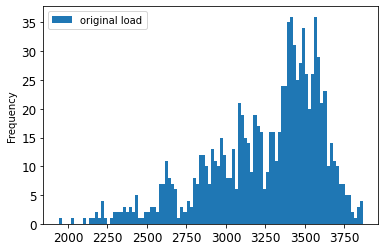

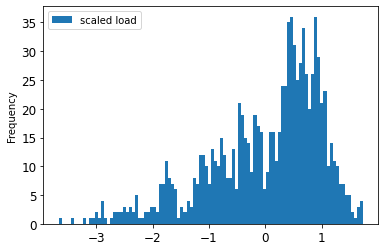

In [21]:
stlf_data[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7201) & (valid.index <=8161)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,-0.277988,-0.138286,-0.883443,-1.658081,-1.228137,-1.532459,-0.376896,-0.900206,-1.136030,1.327241,0.966659,0.648735,-0.616234,0.687014
7202,-0.289176,-0.338239,-0.649914,-1.658081,-1.228137,-1.532459,-0.267567,-0.956324,-1.012585,1.281911,0.863117,0.441893,-0.551306,0.510797
7203,-0.194074,-0.538192,-0.416386,-1.658081,-1.228137,-1.532459,-0.183469,-0.633646,-0.934029,1.271245,0.811346,0.582660,-0.484908,0.664637
7204,-0.174495,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.127403,-0.482127,-0.869501,1.239248,0.803171,0.490730,-0.422430,0.642261
7205,-0.110161,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.273174,-0.369891,-0.891946,1.119257,0.745951,0.450511,-0.352357,0.449260
7206,-0.079393,-0.560534,-0.432824,-1.513750,-1.228137,-1.532459,-0.284387,-0.260461,-0.948057,1.161921,0.841318,0.574042,-0.274688,0.589116
7207,-0.096176,-0.582875,-0.449261,-1.513750,-1.228137,-1.532459,-0.189075,-0.176284,-0.625417,1.132590,0.887640,0.539568,-0.226666,0.547159
7208,-0.054219,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.169452,-0.120166,-0.473916,1.135256,0.781373,0.493603,-0.188199,0.513594
7209,-0.090581,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.104976,-0.266073,-0.361693,1.049930,0.740501,0.398800,-0.162718,0.345767
7210,-0.224843,-1.092253,0.454685,-1.369419,-1.228137,-1.532459,-0.074140,-0.277296,-0.252276,1.036597,0.664207,0.384436,-0.158552,0.387724


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7201,-0.277988,-0.138286,-0.883443,-1.658081,-1.228137,-1.532459,-0.376896,-0.900206,-1.136030,1.327241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.277988
7202,-0.289176,-0.338239,-0.649914,-1.658081,-1.228137,-1.532459,-0.267567,-0.956324,-1.012585,1.281911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.277988,-0.289176
7203,-0.194074,-0.538192,-0.416386,-1.658081,-1.228137,-1.532459,-0.183469,-0.633646,-0.934029,1.271245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.277988,-0.289176,-0.194074
7204,-0.174495,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.127403,-0.482127,-0.869501,1.239248,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.277988,-0.289176,-0.194074,-0.174495
7205,-0.110161,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.273174,-0.369891,-0.891946,1.119257,...,NaN,NaN,NaN,NaN,NaN,-0.277988,-0.289176,-0.194074,-0.174495,-0.110161
7206,-0.079393,-0.560534,-0.432824,-1.513750,-1.228137,-1.532459,-0.284387,-0.260461,-0.948057,1.161921,...,NaN,NaN,NaN,NaN,-0.277988,-0.289176,-0.194074,-0.174495,-0.110161,-0.079393
7207,-0.096176,-0.582875,-0.449261,-1.513750,-1.228137,-1.532459,-0.189075,-0.176284,-0.625417,1.132590,...,NaN,NaN,NaN,-0.277988,-0.289176,-0.194074,-0.174495,-0.110161,-0.079393,-0.096176
7208,-0.054219,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.169452,-0.120166,-0.473916,1.135256,...,NaN,NaN,-0.277988,-0.289176,-0.194074,-0.174495,-0.110161,-0.079393,-0.096176,-0.054219
7209,-0.090581,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.104976,-0.266073,-0.361693,1.049930,...,NaN,-0.277988,-0.289176,-0.194074,-0.174495,-0.110161,-0.079393,-0.096176,-0.054219,-0.090581
7210,-0.224843,-1.092253,0.454685,-1.369419,-1.228137,-1.532459,-0.074140,-0.277296,-0.252276,1.036597,...,-0.277988,-0.289176,-0.194074,-0.174495,-0.110161,-0.079393,-0.096176,-0.054219,-0.090581,-0.224843


In [24]:
valid_shifted = valid_shifted.dropna(how='any')

In [25]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8052,-0.336727,-0.620855,0.874889,1.372873,-0.717211,0.652546,-0.368486,-0.653287,-0.622611,-0.941909,...,-0.566090,-0.663988,-0.787061,-0.596858,-0.387075,-0.373089,-0.395466,-0.420640,-0.367495,-0.336727
8053,-0.319944,-0.620855,0.874889,1.372873,-0.717211,0.652546,-0.390912,-0.776747,-0.678723,-0.915245,...,-0.663988,-0.787061,-0.596858,-0.387075,-0.373089,-0.395466,-0.420640,-0.367495,-0.336727,-0.319944
8054,-0.180089,-0.678941,0.928494,1.372873,-0.717211,0.652546,-0.416142,-0.585945,-0.628222,-0.885914,...,-0.787061,-0.596858,-0.387075,-0.373089,-0.395466,-0.420640,-0.367495,-0.336727,-0.319944,-0.180089
8055,-0.166103,-0.737028,0.982099,1.372873,-0.717211,0.652546,-0.362879,-0.375503,-0.546861,-0.885914,...,-0.596858,-0.387075,-0.373089,-0.395466,-0.420640,-0.367495,-0.336727,-0.319944,-0.180089,-0.166103
8056,-0.166103,-0.737028,0.982099,1.517204,-0.717211,0.652546,-0.332043,-0.361473,-0.645056,-0.928577,...,-0.387075,-0.373089,-0.395466,-0.420640,-0.367495,-0.336727,-0.319944,-0.180089,-0.166103,-0.166103
8057,-0.188480,-0.737028,0.982099,1.517204,-0.717211,0.652546,-0.315223,-0.383921,-0.768501,-0.923244,...,-0.373089,-0.395466,-0.420640,-0.367495,-0.336727,-0.319944,-0.180089,-0.166103,-0.166103,-0.188480
8058,-0.157712,-0.771657,1.017177,1.517204,-0.717211,0.652546,-0.175059,-0.409174,-0.577722,-0.821919,...,-0.395466,-0.420640,-0.367495,-0.336727,-0.319944,-0.180089,-0.166103,-0.166103,-0.188480,-0.157712
8059,-0.124147,-0.806286,1.052255,1.517204,-0.717211,0.652546,-0.161042,-0.355862,-0.367305,-0.773923,...,-0.420640,-0.367495,-0.336727,-0.319944,-0.180089,-0.166103,-0.166103,-0.188480,-0.157712,-0.124147
8060,-0.163306,-0.806286,1.052255,1.661535,-0.717211,0.652546,-0.161042,-0.324997,-0.353277,-0.653933,...,-0.367495,-0.336727,-0.319944,-0.180089,-0.166103,-0.166103,-0.188480,-0.157712,-0.124147,-0.163306
8061,-0.101770,-0.806286,1.052255,1.661535,-0.717211,0.652546,-0.183469,-0.308161,-0.375721,-0.560607,...,-0.336727,-0.319944,-0.180089,-0.166103,-0.166103,-0.188480,-0.157712,-0.124147,-0.163306,-0.101770


In [26]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7211,0.351361
7212,0.429680
7213,0.435275
7214,0.449260
7215,0.460449
...,...
8057,0.989102
8058,1.103783
8059,1.095392
8060,1.045044


In [27]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7211,-0.353509,-1.601631,1.358631,-1.369419,-1.228137,-1.532459,-0.090960,-0.181896,-0.168109,1.004600,0.634234,0.298252,-0.173008
7212,-0.423437,-1.601631,1.358631,-1.225087,-1.228137,-1.532459,-0.048910,-0.162255,-0.111998,0.940605,0.533416,0.186213,-0.198489
7213,-0.417843,-1.601631,1.358631,-1.225087,-1.228137,-1.532459,-0.085353,-0.097719,-0.257887,0.873944,0.497994,0.105774,-0.210740
7214,-0.445814,-1.648547,1.457065,-1.225087,-1.228137,-1.532459,-0.219911,-0.066854,-0.269110,0.865945,0.500719,0.059809,-0.224460
7215,-0.451408,-1.695463,1.555499,-1.225087,-1.228137,-1.532459,-0.348863,-0.083689,-0.173720,0.956604,0.459847,0.085664,-0.247002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,-0.188480,-0.737028,0.982099,1.517204,-0.717211,0.652546,-0.315223,-0.383921,-0.768501,-0.923244,0.822245,0.223559,-0.332511
8058,-0.157712,-0.771657,1.017177,1.517204,-0.717211,0.652546,-0.175059,-0.409174,-0.577722,-0.821919,0.917613,0.272397,-0.294044
8059,-0.124147,-0.806286,1.052255,1.517204,-0.717211,0.652546,-0.161042,-0.355862,-0.367305,-0.773923,0.939411,0.390182,-0.271013
8060,-0.163306,-0.806286,1.052255,1.661535,-0.717211,0.652546,-0.161042,-0.324997,-0.353277,-0.653933,0.923062,0.344217,-0.252637


In [28]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(851, 13, 1)


In [29]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(64, input_shape=(1,1)))
model.add(Dropout(0.2))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.000005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:
import time
start=time.time()

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/300
24/24 [==============================] - 1s 53ms/step - loss: 0.9875 - val_loss: 1.0985
Epoch 2/300
24/24 [==============================] - 1s 26ms/step - loss: 0.9829 - val_loss: 1.0996
Epoch 3/300
24/24 [==============================] - 1s 25ms/step - loss: 0.9789 - val_loss: 1.1007
Epoch 4/300
24/24 [==============================] - 1s 26ms/step - loss: 0.9797 - val_loss: 1.1018
Epoch 5/300
24/24 [==============================] - 1s 26ms/step - loss: 0.9744 - val_loss: 1.1029
Epoch 6/300
24/24 [==============================] - 1s 25ms/step - loss: 0.9749 - val_loss: 1.1040
Training time: 7.311418294906616s


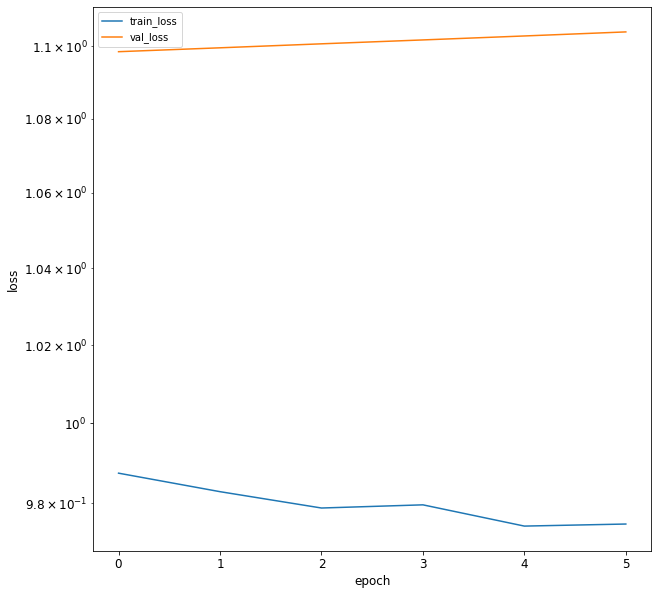

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index<= 8373)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,3572.0,31.667452,62.221236,1.0,4.0,1.0,3645.0,3611.0,3566.0,3223.0,3119.0,3776.0,3609.916667
8163,3529.0,31.032452,64.539000,1.0,4.0,1.0,3642.0,3627.0,3616.0,3215.0,3129.0,3753.0,3602.666667
8164,3548.0,31.032452,64.539000,2.0,4.0,1.0,3624.0,3601.0,3583.0,3183.0,3113.0,3732.0,3599.750000
8165,3538.0,31.032452,64.539000,2.0,4.0,1.0,3603.0,3604.0,3591.0,3158.0,3107.0,3696.0,3595.333333
8166,3519.0,31.007451,66.080650,2.0,4.0,1.0,3572.0,3645.0,3611.0,3127.0,2996.0,3674.0,3587.666667
8167,3491.0,30.982450,67.622300,2.0,4.0,1.0,3529.0,3642.0,3627.0,3107.0,3058.0,3656.0,3576.333333
8168,3472.0,30.982450,67.622300,3.0,4.0,1.0,3548.0,3624.0,3601.0,3081.0,3066.0,3632.0,3565.583333
8169,3481.0,30.982450,67.622300,3.0,4.0,1.0,3538.0,3603.0,3604.0,3061.0,3046.0,3602.0,3555.333333
8170,3453.0,30.312450,67.987480,3.0,4.0,1.0,3519.0,3572.0,3645.0,3052.0,3042.0,3605.0,3539.333333
8171,3400.0,29.642450,68.352660,3.0,4.0,1.0,3491.0,3529.0,3642.0,3021.0,2987.0,3623.0,3519.166667


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8162 to 8373
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


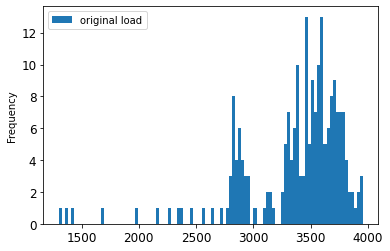

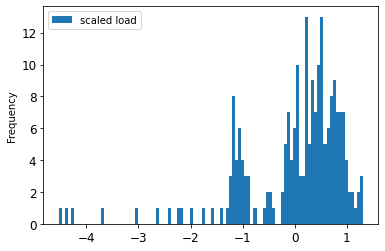

In [36]:
stlf_data[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8162) & (test.index <= 8373)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,0.465474,-0.556642,1.031488,-1.498364,-1.004934,0.0,0.623248,0.545068,0.445888,-0.148456,-0.096212,1.997397,0.604636,-1.246365
8163,0.370861,-0.698857,1.182558,-1.498364,-1.004934,0.0,0.616655,0.580188,0.555619,-0.166678,-0.066969,1.935974,0.586968,-1.186957
8164,0.412667,-0.698857,1.182558,-1.357685,-1.004934,0.0,0.577094,0.523119,0.483197,-0.239566,-0.113757,1.879893,0.579861,-1.164954
8165,0.390664,-0.698857,1.182558,-1.357685,-1.004934,0.0,0.530941,0.529704,0.500754,-0.296509,-0.131303,1.783753,0.569097,-1.149552
8166,0.348858,-0.704456,1.283042,-1.357685,-1.004934,0.0,0.462809,0.619697,0.544646,-0.367119,-0.455899,1.725001,0.550414,-1.094544
8167,0.287249,-0.710056,1.383525,-1.357685,-1.004934,0.0,0.368303,0.613112,0.579760,-0.412674,-0.274593,1.676931,0.522795,-1.079142
8168,0.245443,-0.710056,1.383525,-1.217006,-1.004934,0.0,0.410061,0.573603,0.522700,-0.471896,-0.251199,1.612838,0.496598,-1.098945
8169,0.265246,-0.710056,1.383525,-1.217006,-1.004934,0.0,0.388083,0.527509,0.529284,-0.517450,-0.309684,1.532721,0.471620,-1.186957
8170,0.203637,-0.860109,1.407327,-1.217006,-1.004934,0.0,0.346325,0.459465,0.619264,-0.537950,-0.321382,1.540733,0.432628,-1.184757
8171,0.087021,-1.010163,1.431129,-1.217006,-1.004934,0.0,0.284787,0.365082,0.612680,-0.608560,-0.482217,1.588803,0.383483,-1.180356


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8162,0.465474,-0.556642,1.031488,-1.498364,-1.004934,0.0,0.623248,0.545068,0.445888,-0.148456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.465474
8163,0.370861,-0.698857,1.182558,-1.498364,-1.004934,0.0,0.616655,0.580188,0.555619,-0.166678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.465474,0.370861
8164,0.412667,-0.698857,1.182558,-1.357685,-1.004934,0.0,0.577094,0.523119,0.483197,-0.239566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.465474,0.370861,0.412667
8165,0.390664,-0.698857,1.182558,-1.357685,-1.004934,0.0,0.530941,0.529704,0.500754,-0.296509,...,NaN,NaN,NaN,NaN,NaN,NaN,0.465474,0.370861,0.412667,0.390664
8166,0.348858,-0.704456,1.283042,-1.357685,-1.004934,0.0,0.462809,0.619697,0.544646,-0.367119,...,NaN,NaN,NaN,NaN,NaN,0.465474,0.370861,0.412667,0.390664,0.348858
8167,0.287249,-0.710056,1.383525,-1.357685,-1.004934,0.0,0.368303,0.613112,0.579760,-0.412674,...,NaN,NaN,NaN,NaN,0.465474,0.370861,0.412667,0.390664,0.348858,0.287249
8168,0.245443,-0.710056,1.383525,-1.217006,-1.004934,0.0,0.410061,0.573603,0.522700,-0.471896,...,NaN,NaN,NaN,0.465474,0.370861,0.412667,0.390664,0.348858,0.287249,0.245443
8169,0.265246,-0.710056,1.383525,-1.217006,-1.004934,0.0,0.388083,0.527509,0.529284,-0.517450,...,NaN,NaN,0.465474,0.370861,0.412667,0.390664,0.348858,0.287249,0.245443,0.265246
8170,0.203637,-0.860109,1.407327,-1.217006,-1.004934,0.0,0.346325,0.459465,0.619264,-0.537950,...,NaN,0.465474,0.370861,0.412667,0.390664,0.348858,0.287249,0.245443,0.265246,0.203637
8171,0.087021,-1.010163,1.431129,-1.217006,-1.004934,0.0,0.284787,0.365082,0.612680,-0.608560,...,0.465474,0.370861,0.412667,0.390664,0.348858,0.287249,0.245443,0.265246,0.203637,0.087021


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8269,-1.186957,-1.381937,1.113517,-1.076327,0.516823,0.0,-1.150379,-1.261379,-1.399796,0.213705,...,-1.149552,-1.259567,-1.246365,-1.186957,-1.164954,-1.149552,-1.094544,-1.079142,-1.098945,-1.186957
8270,-1.184757,-1.379698,1.140597,-1.076327,0.516823,0.0,-1.095434,-1.248210,-1.239588,0.186372,...,-1.259567,-1.246365,-1.186957,-1.164954,-1.149552,-1.094544,-1.079142,-1.098945,-1.186957,-1.184757
8271,-1.180356,-1.377458,1.167677,-1.076327,0.516823,0.0,-1.080049,-1.188946,-1.167166,0.209149,...,-1.246365,-1.186957,-1.164954,-1.149552,-1.094544,-1.079142,-1.098945,-1.186957,-1.184757,-1.180356
8272,-1.109946,-1.377458,1.167677,-0.935648,0.516823,0.0,-1.099830,-1.166996,-1.151803,0.204594,...,-1.186957,-1.164954,-1.149552,-1.094544,-1.079142,-1.098945,-1.186957,-1.184757,-1.180356,-1.109946
8273,-1.112147,-1.377458,1.167677,-0.935648,0.516823,0.0,-1.187742,-1.151632,-1.261535,0.159039,...,-1.164954,-1.149552,-1.094544,-1.079142,-1.098945,-1.186957,-1.184757,-1.180356,-1.109946,-1.112147


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8172,-1.109946
8173,-1.112147
8174,-1.061539
8175,-1.050538
8176,-1.057139
...,...
8269,0.447872
8270,0.474275
8271,0.463274
8272,0.529283


In [41]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8172,0.065018,-1.010163,1.431129,-1.076327,-1.004934,0.0,0.243028,0.406786,0.573176,-0.656393,-0.444202,1.506015,0.335963
8173,0.047416,-1.010163,1.431129,-1.076327,-1.004934,0.0,0.262809,0.384837,0.527089,-0.713336,-0.467596,1.457945,0.291083
8174,0.021012,-1.056075,1.517730,-1.076327,-1.004934,0.0,0.201270,0.343133,0.459056,-0.763446,-0.520233,1.297712,0.250061
8175,0.043015,-1.101987,1.604331,-1.076327,-1.004934,0.0,0.084786,0.281674,0.364687,-0.893278,-0.485142,1.407205,0.219802
8176,0.038614,-1.101987,1.604331,-0.935648,-1.004934,0.0,0.062808,0.239970,0.406384,-0.843167,-0.441277,1.433911,0.185279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,-1.186957,-1.381937,1.113517,-1.076327,0.516823,0.0,-1.150379,-1.261379,-1.399796,0.213705,-0.517309,-0.096316,-1.297196
8270,-1.184757,-1.379698,1.140597,-1.076327,0.516823,0.0,-1.095434,-1.248210,-1.239588,0.186372,-0.581643,-0.144386,-1.292322
8271,-1.180356,-1.377458,1.167677,-1.076327,0.516823,0.0,-1.080049,-1.188946,-1.167166,0.209149,-0.748327,-0.112340,-1.293743
8272,-1.109946,-1.377458,1.167677,-0.935648,0.516823,0.0,-1.099830,-1.166996,-1.151803,0.204594,-0.683993,-0.072281,-1.290088


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 13, 1)

In [43]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,13,1)

In [44]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.9630551338195801s


In [45]:
feature=stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3360.450472
dtype: float64
Cons    455.557589
dtype: float64


In [46]:
load_mean=3360.450472
load_std=455.557589
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(102, 1)


In [47]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(102, 1)


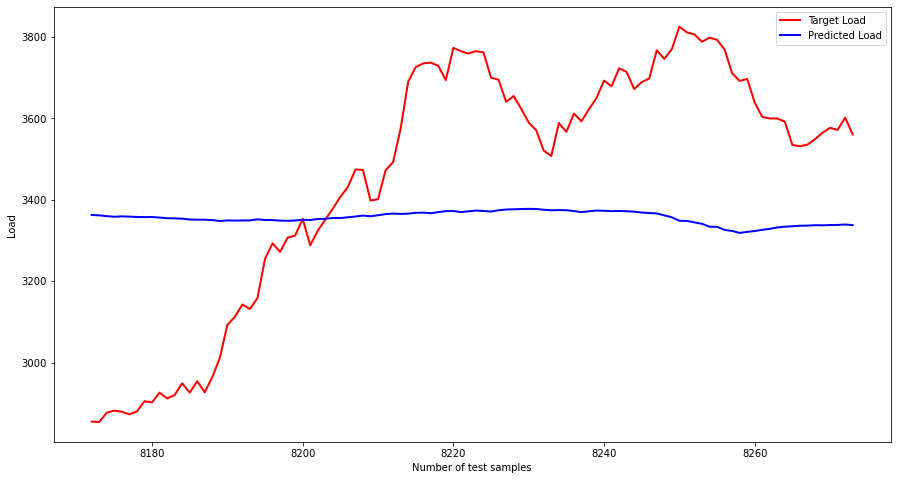

In [48]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

8.412043638187953


In [50]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100    2.074546
dtype: float64


In [51]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8172  285362.819182
8173  285262.573360
8174  287569.030931
8175  288070.465268
8176  287769.602756
...             ...
8269  356354.555693
8270  357557.693673
8271  357056.371547
8272  360064.224182
8273  355953.491162

[102 rows x 1 columns]


In [52]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+100
8172  257760.849193
8173  257844.570889
8174  233019.797284
8175  226891.676718
8176  230614.460124
...             ...
8269   51687.661801
8270   57008.754026
8271   54511.557592
8272   68920.869550
8273   49684.319883

[102 rows x 1 columns]
y_t+100    101160.912199
dtype: float64


In [53]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    318.058033
dtype: float64


In [54]:
a=np.array(rescaled_predicted_load)

In [55]:
for i in  range(0,102):
    b=a[i]
    print(b)

[3362.5076]
[3361.5876]
[3359.5793]
[3358.2014]
[3359.0862]
[3358.4258]
[3357.639]
[3357.29]
[3357.4797]
[3356.1213]
[3354.6135]
[3354.1418]
[3353.4648]
[3351.3503]
[3351.0156]
[3350.8806]
[3349.8728]
[3347.7417]
[3349.1135]
[3348.741]
[3349.0408]
[3349.1992]
[3351.7761]
[3350.161]
[3349.9795]
[3348.6167]
[3348.1443]
[3348.881]
[3350.7556]
[3350.1382]
[3352.6077]
[3353.1482]
[3355.1306]
[3354.8489]
[3356.9395]
[3358.6953]
[3361.0803]
[3359.2349]
[3361.8582]
[3364.6785]
[3365.9705]
[3365.0667]
[3365.728]
[3367.7795]
[3368.3386]
[3366.766]
[3369.5562]
[3371.995]
[3372.197]
[3369.64]
[3371.4587]
[3373.3726]
[3372.4053]
[3370.8174]
[3374.083]
[3375.9246]
[3376.4805]
[3377.0715]
[3377.551]
[3377.2449]
[3375.3428]
[3373.968]
[3374.598]
[3374.19]
[3372.186]
[3369.5674]
[3371.6704]
[3373.3025]
[3372.7952]
[3371.893]
[3372.2717]
[3371.7551]
[3370.6028]
[3368.514]
[3367.2837]
[3366.3237]
[3361.6223]
[3356.78]
[3348.23]
[3347.8738]
[3344.3171]
[3340.8503]
[3333.6738]
[3333.4116]
[3325.8257]
[3323